In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

In [2]:
data = pd.read_csv('student-mat.csv')

In [3]:
data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
data.shape

(395, 33)

In [5]:
data.school.unique()

array(['GP', 'MS'], dtype=object)

In [6]:
data.address.unique()

array(['U', 'R'], dtype=object)

In [7]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [8]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [9]:
data.groupby('sex')['G1'].mean()

sex
F    10.620192
M    11.229947
Name: G1, dtype: float64

<AxesSubplot:xlabel='G1', ylabel='G2'>

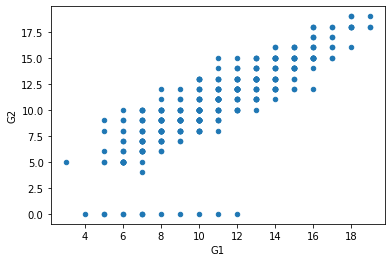

In [10]:
data.plot.scatter(x='G1',y='G2')

In [11]:
data2 = data[['age','studytime','failures','G1','G2','G3']]

In [12]:
data2.head()

,age,studytime,failures,G1,G2,G3
0,18,2,0,5,6,6
1,17,2,0,5,5,6
2,15,2,3,7,8,10
3,15,3,0,15,14,15
4,16,2,0,6,10,10


In [13]:
data2.groupby('age').count()

,studytime,failures,G1,G2,G3
age,,,,,
15,82,82,82,82,82
16,104,104,104,104,104
17,98,98,98,98,98
18,82,82,82,82,82
19,24,24,24,24,24
20,3,3,3,3,3
21,1,1,1,1,1
22,1,1,1,1,1


In [14]:
data2.dtypes

age          int64
studytime    int64
failures     int64
G1           int64
G2           int64
G3           int64
dtype: object

In [15]:
data2.corr()

,age,studytime,failures,G1,G2,G3
age,1.000000,-0.004140,0.243665,-0.064081,-0.143474,-0.161579
studytime,-0.004140,1.000000,-0.173563,0.160612,0.135880,0.097820
failures,0.243665,-0.173563,1.000000,-0.354718,-0.355896,-0.360415
G1,-0.064081,0.160612,-0.354718,1.000000,0.852118,0.801468
G2,-0.143474,0.135880,-0.355896,0.852118,1.000000,0.904868
G3,-0.161579,0.097820,-0.360415,0.801468,0.904868,1.000000


<AxesSubplot:>

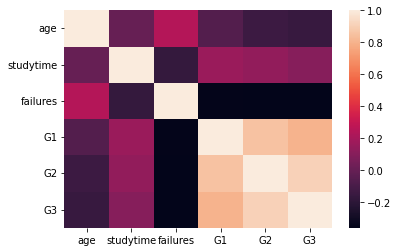

In [16]:
sns.heatmap(data2.corr())

<AxesSubplot:>

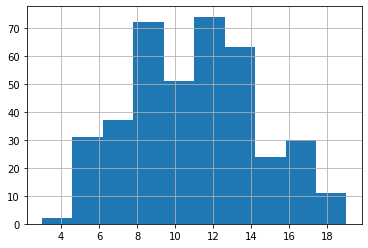

In [17]:
data.G1.hist()

In [18]:
x = data2[['G1','G2']]
y = data2['G3']

In [19]:
x.head()

,G1,G2
0,5,6
1,5,5
2,7,8
3,15,14
4,6,10


In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42)

In [21]:
model = LinearRegression()

In [22]:
model.fit(x,y)

LinearRegression()

In [31]:
pre = model.predict([[15,14]])

/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [32]:
pre

array([14.28515238])

In [30]:
y.head()

0     6
1     6
2    10
3    15
4    10
Name: G3, dtype: int64